MULIPLE LINEAR REGRESSION MODEL

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [14]:
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])


here our training data has 3 training examples and 4 input features, this is represented by x_train matrix
y_train is the corresponding house price of each training example or each house having 4 input features


In [15]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")


w_init shape: (4,), b_init type: <class 'float'>


b_init represents the initial base price of the house
w_init represents the weight of the model for corresponding input feature

In [16]:
def predict_output(x,y,w,b):  
    m = x.shape[0] #number of training examples
    output = np.zeros(m)
    for i in range(m):
        output[i] = np.dot(w,x[i]) + b
    return output
y_pred = predict_output(x_train,y_train,w_init,b_init)
y_pred

array([459.99999762, 231.99999837, 177.99999899])

predict_output is our function which predicts the house price

In [17]:
m = x_train.shape[0]
def cost_function(y,y_pred,m):
    squared_error = 0
    for i in range(m):
        cost_error = y_pred[i] - y[i]
        squared_error+=np.square(cost_error)
    return squared_error/(2*m)
cost_function(y_train,y_pred,m)    
        
    

np.float64(1.5578904428966628e-12)

The cost function computes the average squared error between the predicted values and the actual values, and it is what we minimize to train the linear regression model.

In [20]:
def compute_derivatives(x,y,y_pred,w,b):
    m,n = x.shape  
    df_dw = np.zeros(n)  #partial derivative of  error with respect to each weight
    df_db = 0  #partial derivative of error with respect to the bias price
    for i in range(m):
        error = y_pred[i] - y[i]
        for j in range(n):
            df_dw[j]+=error * x[i,j]   #here we are using the each features of ith training example to get the final weights of corresponding input features
        df_db += error
    derivatives = {
         'df_dw':df_dw/m,
         'df_db':df_db/m
     }   
    return derivatives
compute_derivatives(x_train,y_train,y_pred,w_init,b_init)        
        

{'df_dw': array([-2.72623577e-03, -6.27197263e-06, -2.21745578e-06, -6.92403391e-05]),
 'df_db': np.float64(-1.6739251501955248e-06)}

Here compute_derivatives is a function that calculates the partial derivative of the loss function with respect to the parameters of the model

In [25]:
def gradient_descent(x,y,w_init,b_init,gradient,y_pred,cost_function,alpha,iterations):
    w = copy.deepcopy(w_init)  #making the copy of the weight of the model
    b = b_init
    m = x.shape[0]
    J_history = []
    for i in range(iterations):
        grads = gradient(x,y,y_pred,w,b)
        df_dw = grads['df_dw']
        df_db = grads['df_db']
        w = w - alpha * df_dw
        b = b - alpha * df_db
        if i<100000:
         J_history.append(cost_function(y,y_pred,m))
    return w,b  
iterations = 1000
alpha = 5.0e-7
final_w,final_b = gradient_descent(x_train,y_train,w_init,b_init,compute_derivatives,y_pred,cost_function,alpha,iterations)            
print('The final weight of the model is:', final_w)
print('The final bias price of the house is:', final_b)

The final weight of the model is: [  0.39133671  18.75376741 -53.36032453 -26.42131615]
The final bias price of the house is: 785.1811368002041


gradient_descent is the function that is used for updating the parameters of the model or also known as back propagation in neural network

In [26]:

for i in range(m):
    print(f'predicted house price: {np.dot(final_w,x_train[i]) + final_b}, Target house price: {y_train[i]}')
    

predicted house price: 460.0028671950055, Target house price: 460
predicted house price: 232.00192994162103, Target house price: 232
predicted house price: 178.00116158577612, Target house price: 178


Checking how efficiently our model is working

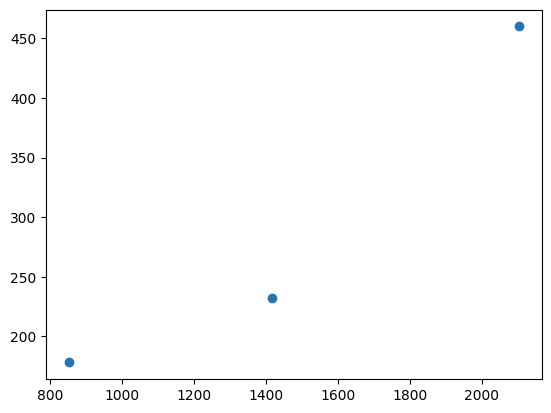

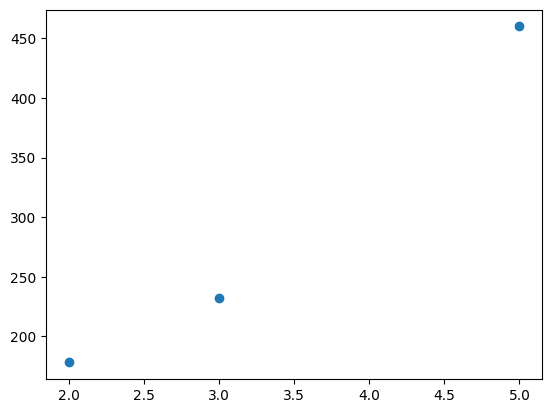

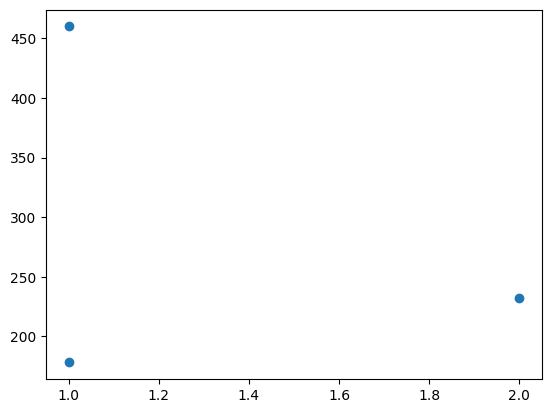

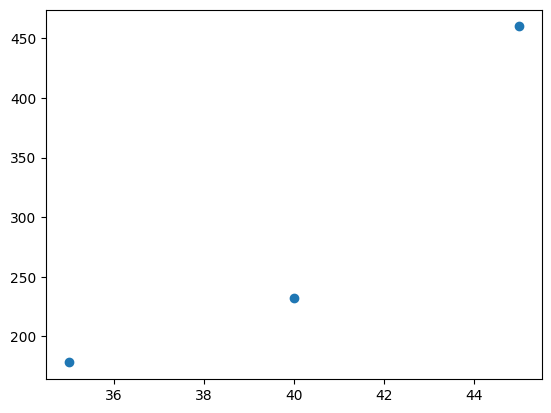

In [34]:
n = x_train.shape[1]
for i in range(n):
    plt.figure()
    plt.scatter(x_train[:,i],y_train,label='Original training dataset')
    plt.show()

ValueError: x and y must be the same size

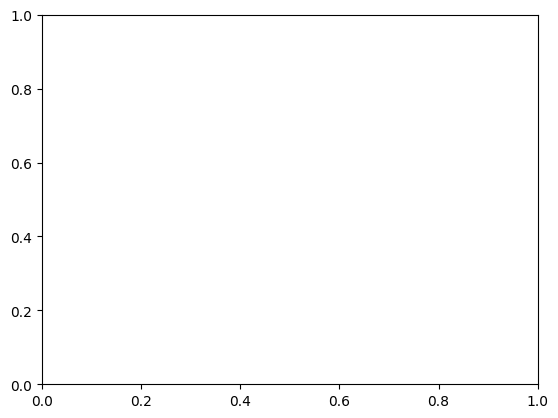